In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
from cellpose import io
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import regionprops

file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/codes_yunus/input/tif_deneme_1.tif"
img = io.imread(file_name) # (9, 4, 1024, 1024)
print(f'img       : {img.shape}')

# NUCLEI
img_nuclei = img[:, 0, :, :]
# img_nuclei = img_nuclei[6, :, :]
print(f'Nuclei    : {img_nuclei.shape}')

# NUCLEI
img_aggregate = img[:, 2, :, :]
# img_aggregate = img_aggregate[6, :, :]
print(f'Aggregate : {img_aggregate.shape}')

# CELL BODY
img_cellbody = img[:, 3, :, :]
# img_cellbody = img_cellbody[6, :, :]
print(f'Cell body : {img_cellbody.shape}')

# Process aggregates (Channel 2)
def process_aggregates(img):
    aggregate_masks = []
    for z_slice in range(img.shape[0]):
        slice_img = img[z_slice, 2, :, :]  # Channel 2 for aggregates
        threshold = 0.6 * np.max(slice_img)
        bright_spots = slice_img > threshold
        clean_mask = morphology.remove_small_objects(bright_spots, min_size=10)
        aggregate_masks.append(clean_mask)
    return aggregate_masks

aggregate_masks = process_aggregates(img)
aggregate_stack = np.stack(aggregate_masks, axis=0)  # shape: (Z, Y, X)

labeled_aggregates, num_aggregates = label(aggregate_stack)
props = regionprops(labeled_aggregates)


# # Her Z-slice için agregat sayısını hesaplama ve yazdırma
# for z_slice in range(labeled_aggregates.shape[0]):
#     labeled_slice = labeled_aggregates[z_slice, :, :]
#     props = regionprops(labeled_slice)
#     num_aggregates_z = len(props)  # Agregat sayısı, regionprops ile hesaplanır
#     print(f"Z-slice {z_slice+1}: {num_aggregates_z} aggregates")

for i, labeled_slice in enumerate(labeled_aggregates):
    props = regionprops(labeled_slice)
    num_aggregates_z = len(props)  # Agregat sayısı, regionprops ile hesaplanır
    print(f"Z-slice {i+1}: {num_aggregates_z} agg")

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:00<00:00, 758.33it/s]


img       : (9, 4, 1024, 1024)
Nuclei    : (9, 1024, 1024)
Aggregate : (9, 1024, 1024)
Cell body : (9, 1024, 1024)
Z-slice 1: 4 agg
Z-slice 2: 7 agg
Z-slice 3: 30 agg
Z-slice 4: 33 agg
Z-slice 5: 20 agg
Z-slice 6: 10 agg
Z-slice 7: 2 agg
Z-slice 8: 3 agg
Z-slice 9: 1 agg


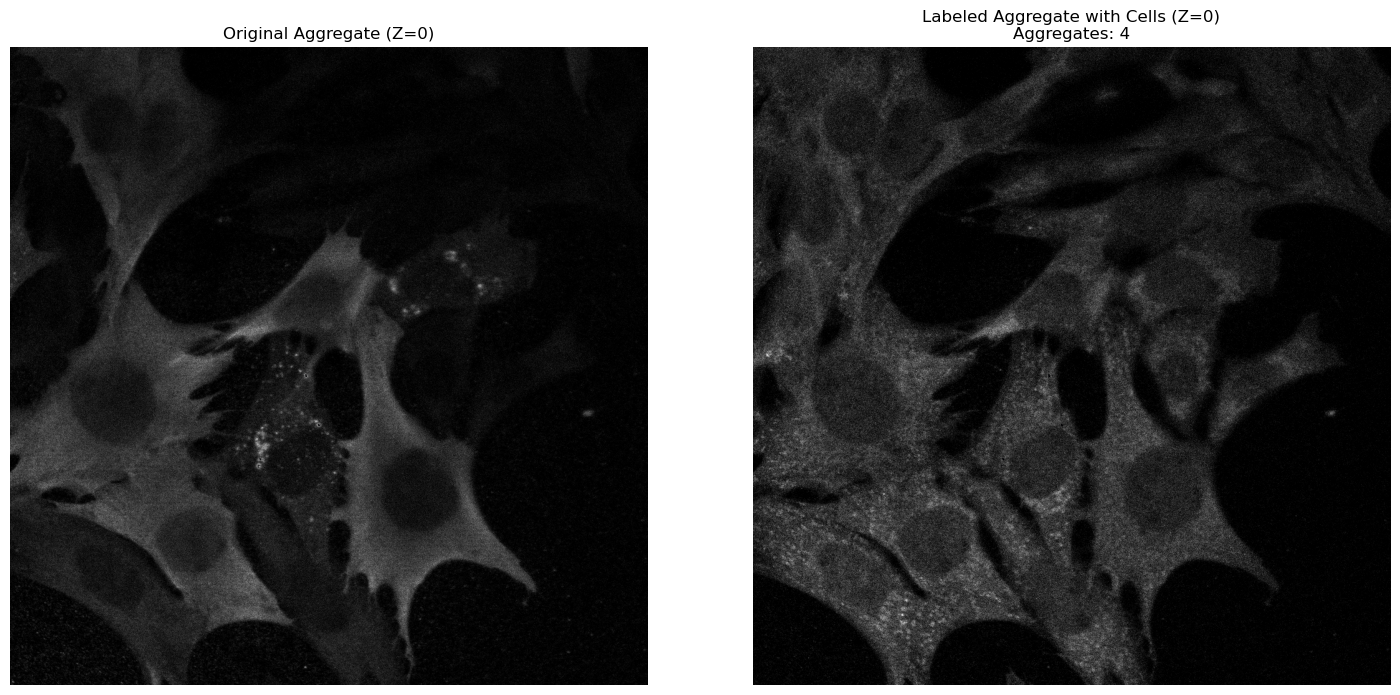

Z-slice 1: 4 aggregates


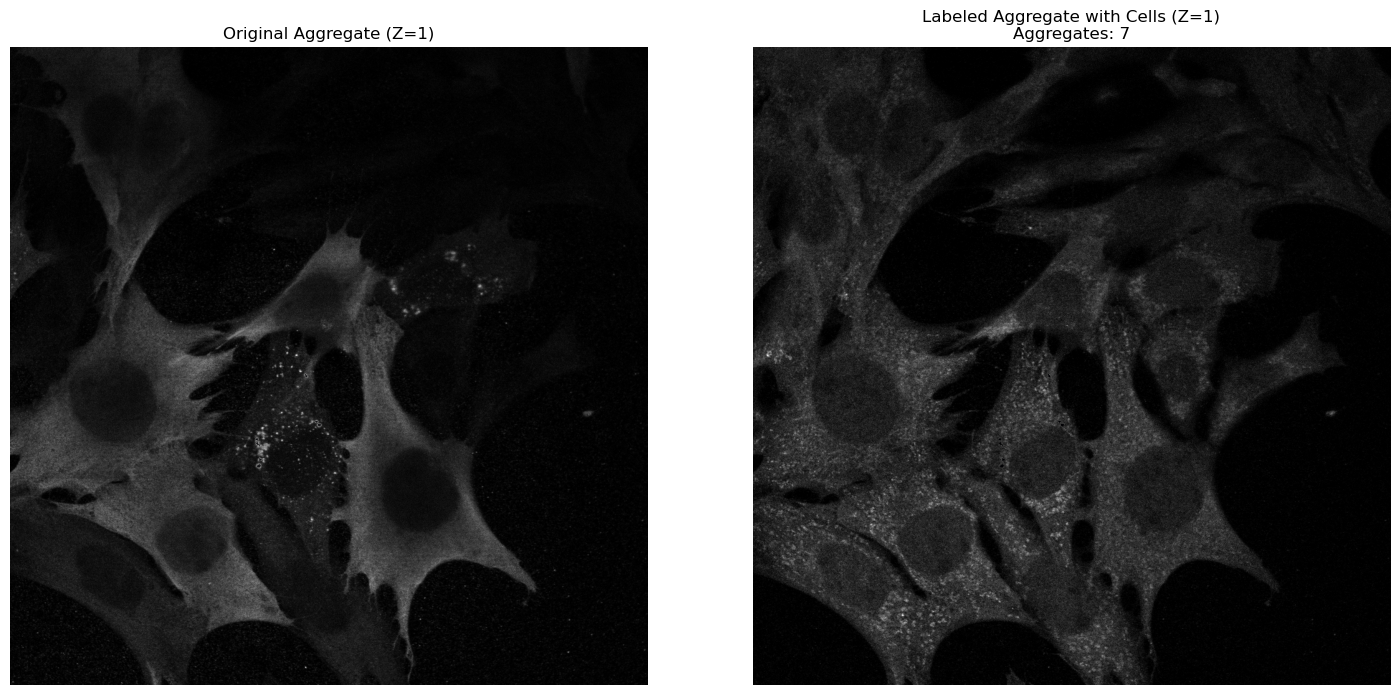

Z-slice 2: 7 aggregates


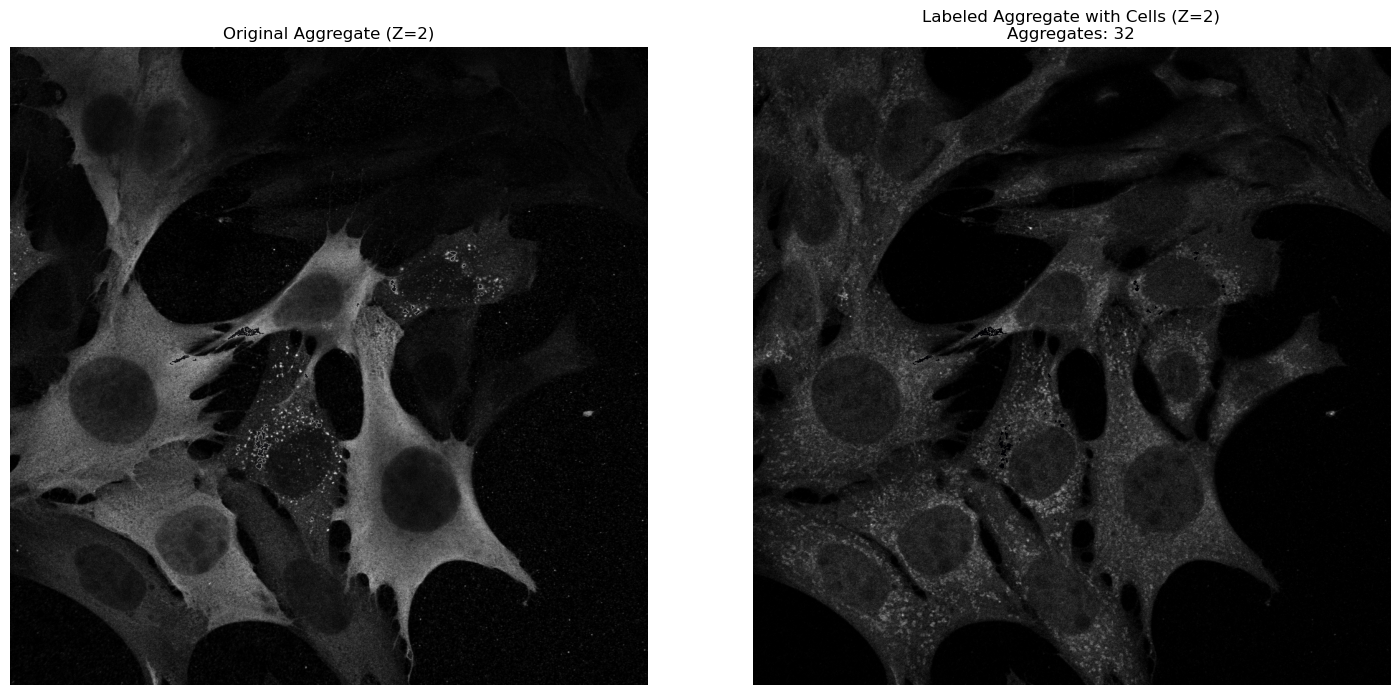

Z-slice 3: 32 aggregates


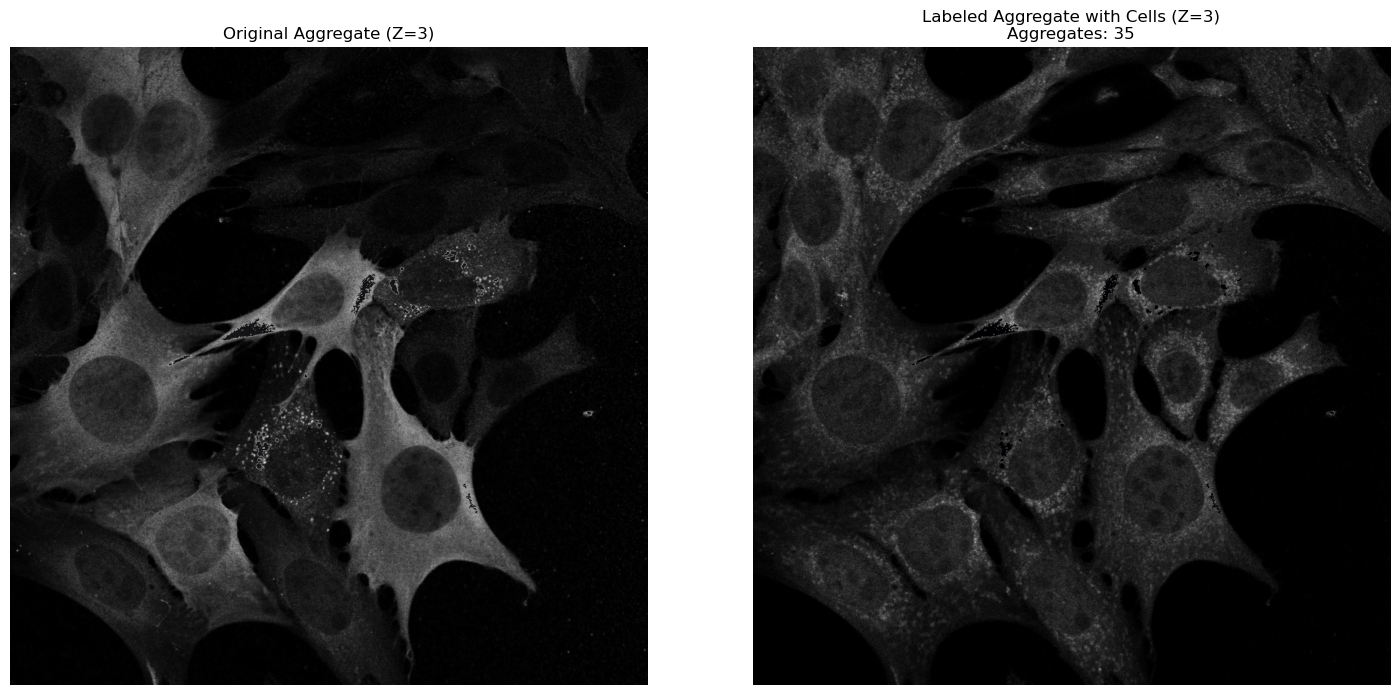

Z-slice 4: 35 aggregates


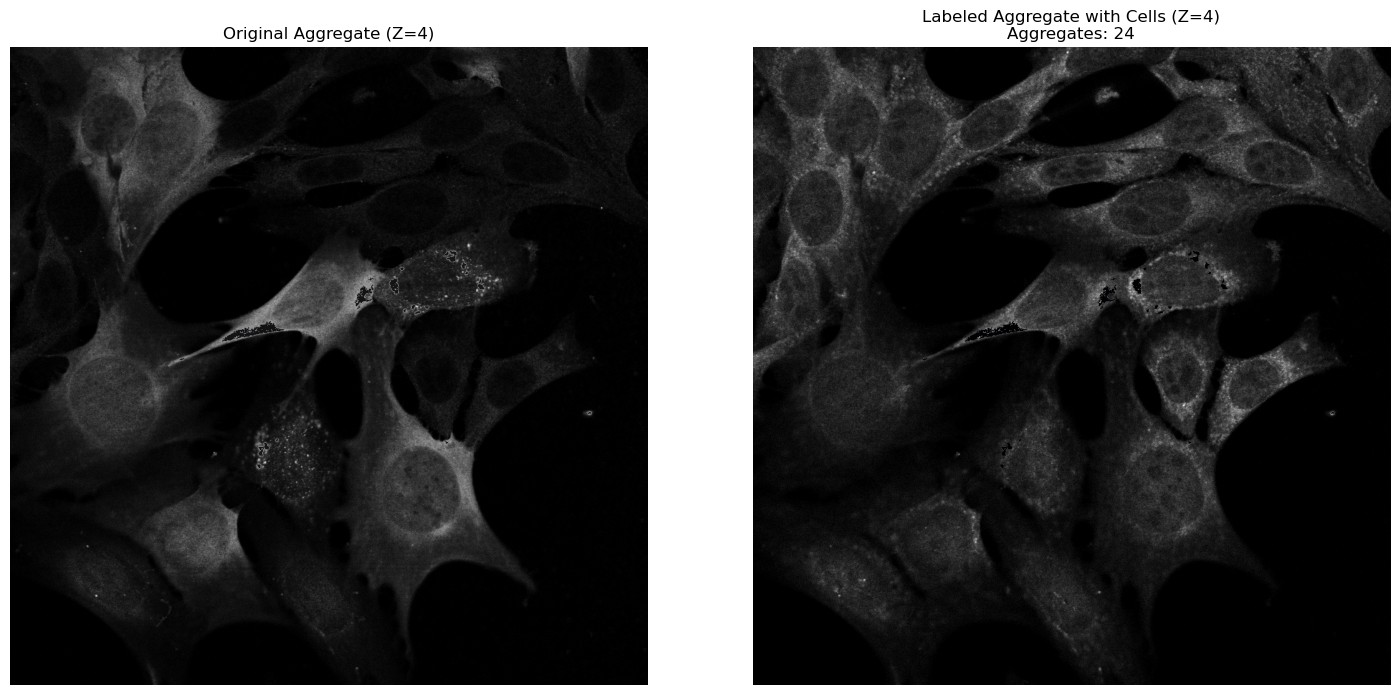

Z-slice 5: 24 aggregates


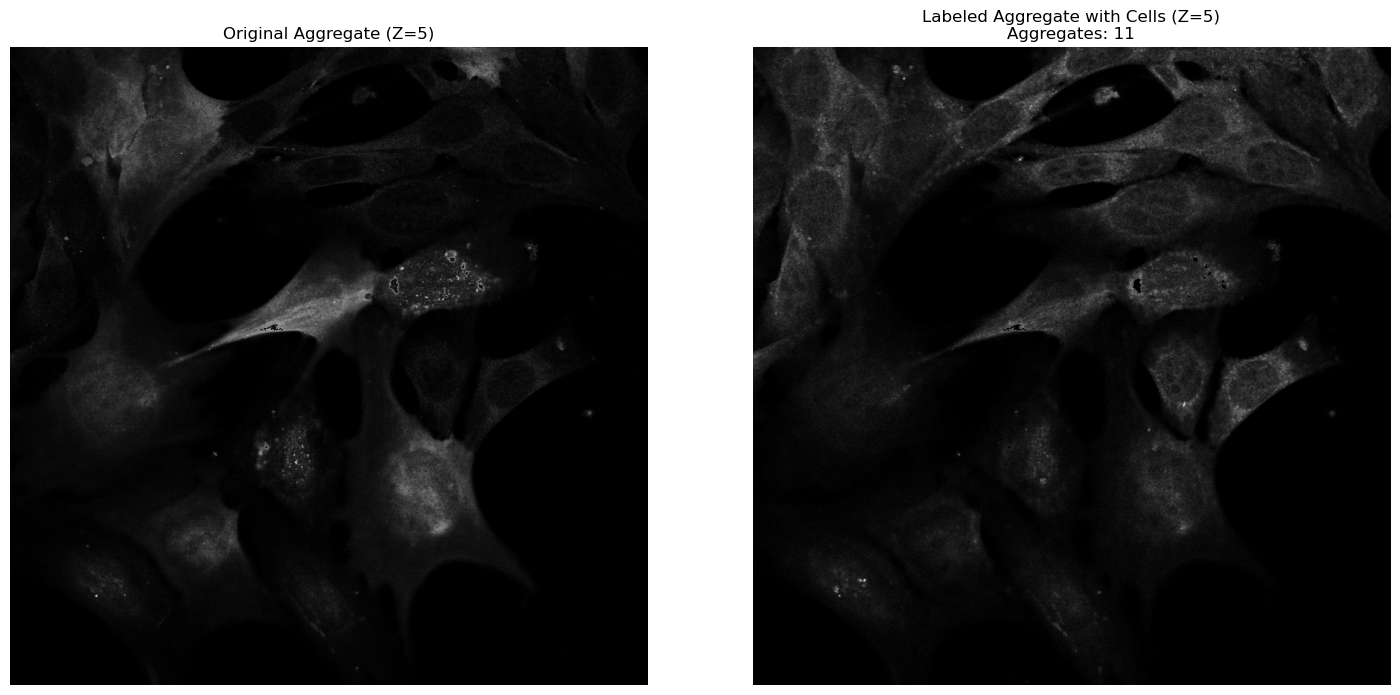

Z-slice 6: 11 aggregates


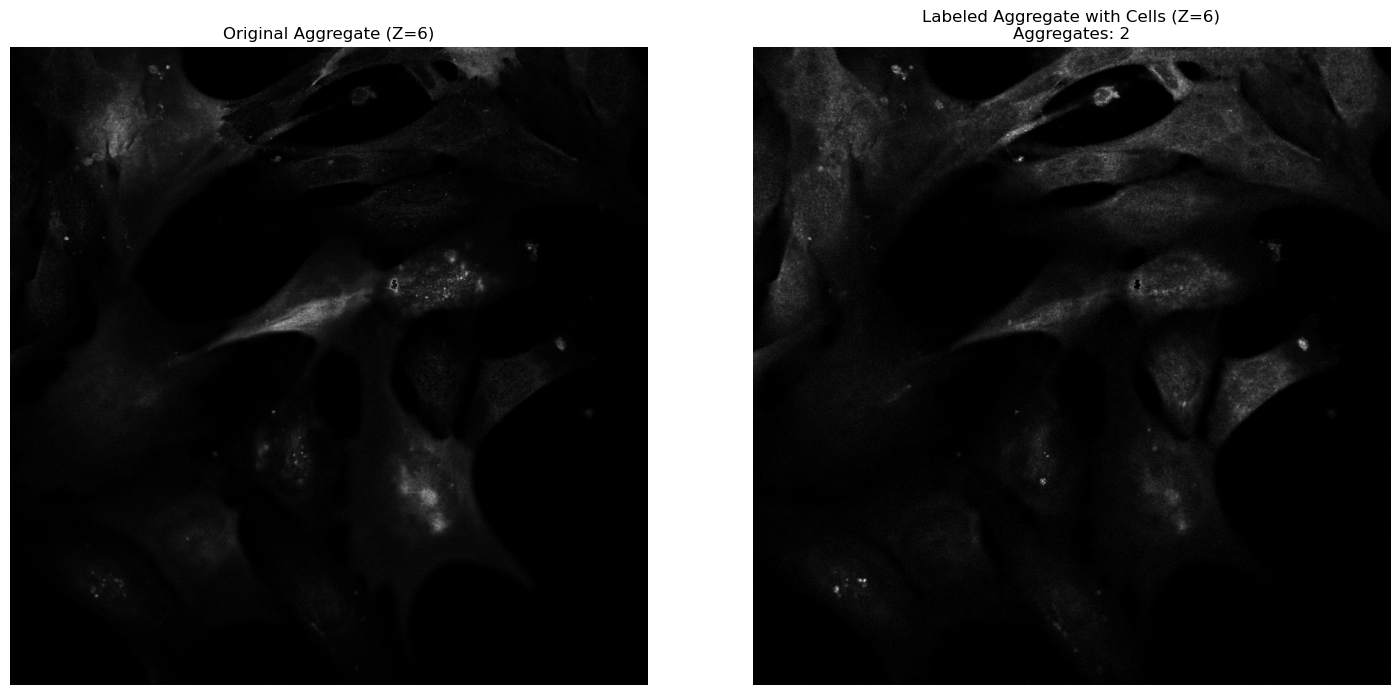

Z-slice 7: 2 aggregates


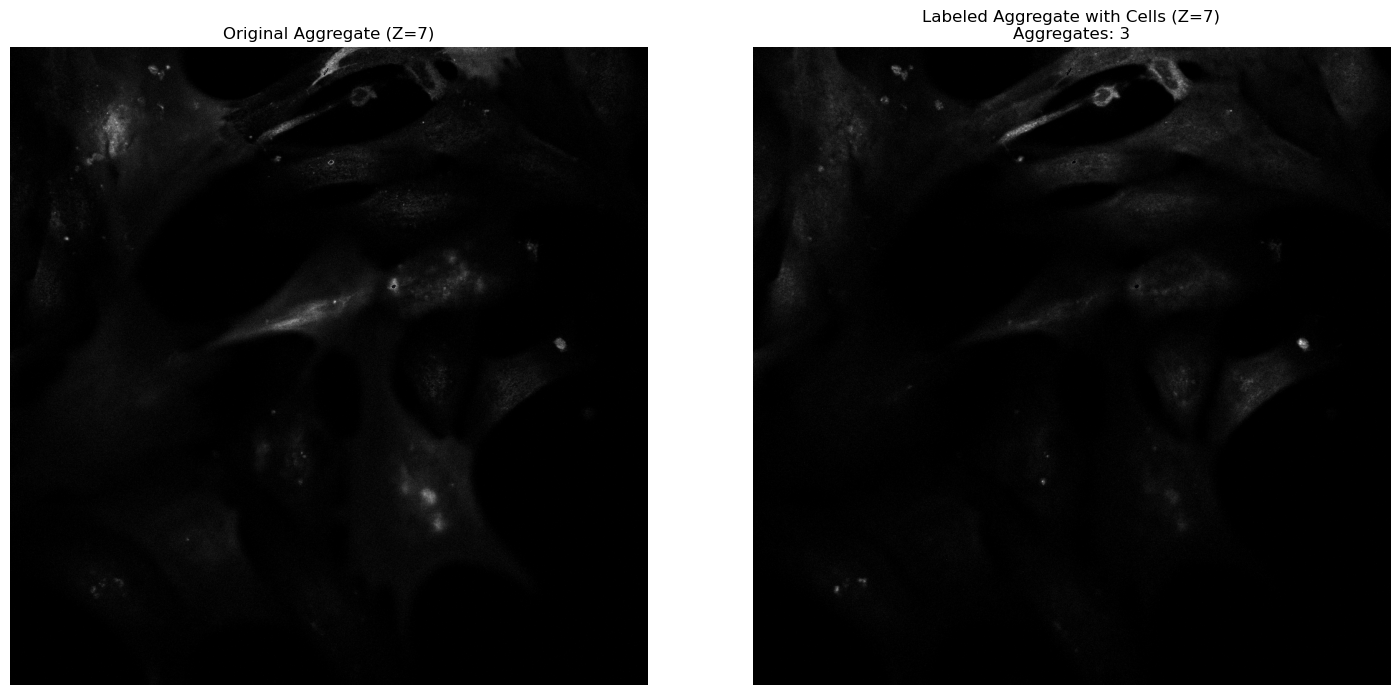

Z-slice 8: 3 aggregates


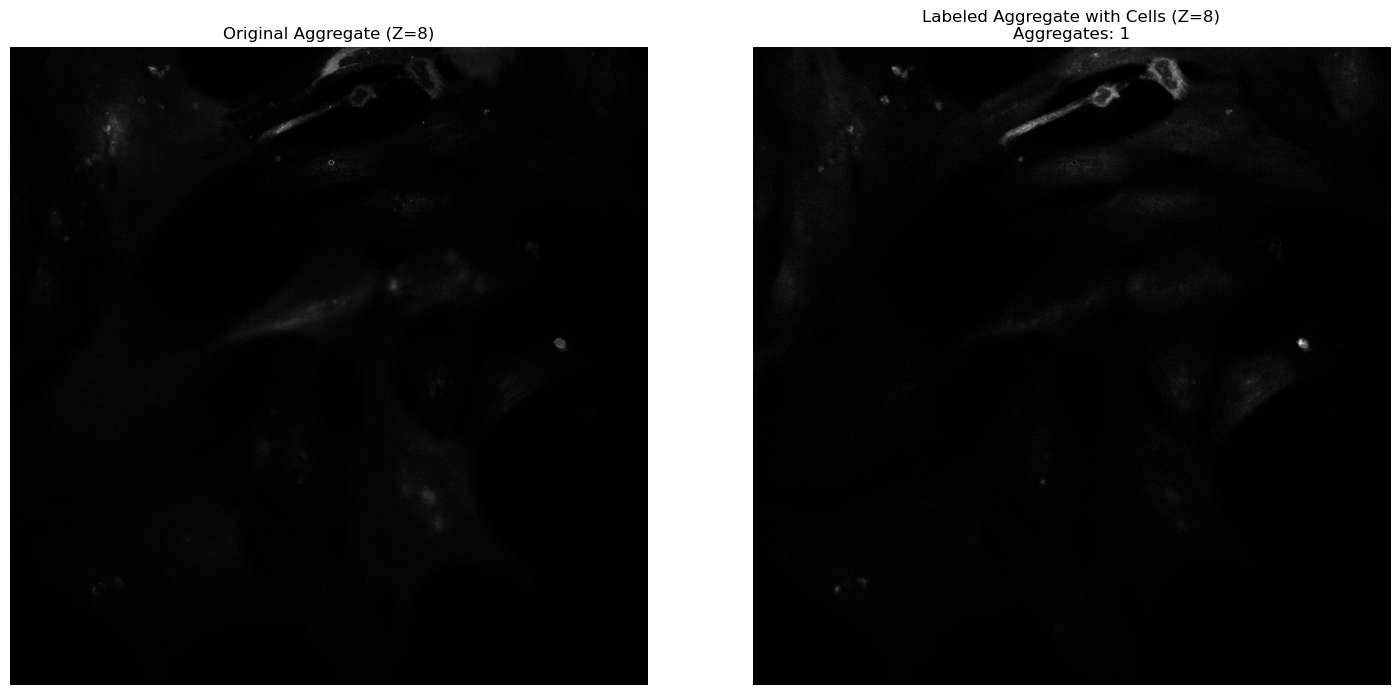

Z-slice 9: 1 aggregates


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops
from scipy.ndimage import label
from skimage import morphology

# Temizleme: Etiketlenmiş agregatlar üzerinde küçük nesneleri kaldırma
def clean_labels(labeled_img, min_size=10):
    return morphology.remove_small_objects(labeled_img > 0, min_size=min_size)

# Görselleştirme: Her Z-slice için orijinal ve etiketli agregatları yan yana
for z_slice in range(img.shape[0]):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Orijinal agregat görüntüsü (Channel 2'den)
    axes[0].imshow(img[z_slice, 2, :, :], cmap='gray')
    axes[0].set_title(f'Original Aggregate (Z={z_slice})')
    
    # Etiketli agregatları temizleme (küçük nesneleri kaldırma)
    labeled_slice = labeled_aggregates[z_slice, :, :]
    cleaned_slice = clean_labels(labeled_slice)

    # Agregatları renkli olarak eklemek
    labeled_overlay = np.ma.masked_where(cleaned_slice == 0, cleaned_slice)
    
    axes[0].imshow(labeled_overlay, cmap='magma', alpha=0.9)  # Renkli agregatlar
    axes[0].axis('off')

    # Etiketli agregatlar ve hücreleri birleştirme
    cell_img = img[z_slice, 3, :, :]  # Hücrelerin olduğu kanal (Cell Body)
    
    # Renkli agregatları arka planda hücrelerin üzerinde gösterme
    axes[1].imshow(cell_img, cmap='gray')
    axes[1].imshow(labeled_overlay, cmap='inferno')  # Renkli agregatlar

    # Agregat sayısını yazma (bu sadece o Z-slice için)
    labeled_slice = label(cleaned_slice.astype(np.uint8))  # Etiketleri tam sayıya dönüştürme
    props = regionprops(labeled_slice[0])  # `label` fonksiyonu 2 öğe döner (etiketli görüntü ve sayı)
    num_aggregates_z = len(props)  # Agregat sayısı, regionprops ile hesaplanır
    axes[1].set_title(f'Labeled Aggregate with Cells (Z={z_slice})\nAggregates: {num_aggregates_z}')
    
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Agregat sayısını yazdırma (her Z-slice için)
    print(f"Z-slice {z_slice+1}: {num_aggregates_z} aggregates")
